<div class="alert alert-block alert-info"> 
    <center><h1 "> Tarea 1: Cálculo Científico I - MAT2605</h1> </center>
</div>
    <!-- <b></b>     -->
    <h4 style="color:#173F8A;;text-align:right;"> Profesor: Manuel A. Sánchez<br> Ayudantes: Diego Vera, Tomás Malfetano <br></h4>

<!-- 
<div class="alert alert-block alert-success"> Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe you decide to use green boxes for related links from each section of a notebook. </div>

<div class="alert alert-block alert-warning"> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. </div>

<div class="alert alert-block alert-danger"> In general, just avoid the red boxes. </div>

############# Markdown parser in Sphinx ##################

<div class="admonition note"> <p class="admonition-title">Note</p> <p>You should note that the title will be automatically capitalized.</p> </div>

<div class="admonition danger"> <p class="admonition-title">Don't try this at home</p> <p>...</p> </div>
 -->
<!-- <div class="admonition important"> <p>This is an admonition box without a title.</p> </div> -->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

<div class="alert alert-block alert-success"> <b> Nombre de estudiante: </b> INCLUIR NOMBRE EN LA ENTREGA DE RESPUESTAS</div>


<div class="alert alert-block alert-info"> <b> Problema 1. Floating Point Arithmetic </b> </div>
a Utilice el metodo de redondeo y encuentre el número de máquina mas cercano a $5, \pi, 0$ en: 
- base 10 y con 4 dígitos de precisión y truncamiento,
- base 2 y con 8 dígitos de precisión y truncamiento. 

b Considere la definición de punto flotante es equivalente a: $fl(x) = x(1+\epsilon)$,  con $|\epsilon|\leq \epsilon_{\texttt{maquina}}$.

Sea el problema $f$ correspondiente a la suma de n\'umeros reales, es decir $f(x_1,x_2) = x_1 + x_2$, y consideremos el algoritmo $\tilde{f}$ que calcula
$$
\begin{equation*}
\tilde{f}(x_1,x_2) = \text{fl}(x_1) \oplus \text{fl}(x_2).
\end{equation*}
$$
Demuestre que 
$$
\begin{equation*}
\frac{| f(x_1,x_2) - \tilde{f} (x_1,x_2) | }{ | f(x_1,x_2) |} \leq 2\epsilon +\epsilon^2.
\end{equation*}
$$
Similarmente derive un estimado para el problema de la resta de 2 números reales. Comente su resultado.


<div class="alert alert-block alert-success"> <b> Solución. </b> </div>

a)
Base 10 y con 4 dígitos de precisión y truncamiento:
- Número 5: $0.5000 \cdot 10^1$
- Número $\pi$: $0.3141 \cdot 10^1$
- Número 0: $0.0000 \cdot 10^0$

Base 2 y con 8 dígitos de precisión y truncamiento:
- Número 5: $101.00000_{2}$ o $0.10100000 \cdot 2^3$
$$ 5 = 1 \cdot 2^2 + 0 \cdot 2^1 + 1 \cdot 2^0 + 0 \cdot 2^{-1} +...$$

- Número $\pi$: $11.001001_{2}$  o $0.11001001 \cdot 2^2$
$$ 3.140625 = 1 \cdot 2^1 + 1 \cdot 2^0 + 0 \cdot \frac{1}{2^1}+...+ 1 \cdot \frac{1}{2^3} +...+ 1 \cdot \frac{1}{2^6}$$
- Número 0: $0.00000000_{2}$  o $0.00000000 \cdot 2^0$

b) Por definición, $\tilde{f} (x_1,x_2)$ corresponde a
\begin{align*}
\tilde{f} (x_1,x_2) = fl(fl(x_1)+fl(x_2)) =(x_1(1+\epsilon_1) + x_2(1+\epsilon_2))(1+\epsilon_3)
\end{align*}

\begin{align*}
| f(x_1,x_2) - \tilde{f} (x_1,x_2) | &= | x_1 + x_2 - (x_1(1+\epsilon_1) + x_2(1+\epsilon_2))(1+\epsilon_3) | \\
&= | (x_1 + x_2) - (x_1 + x_1\epsilon_1 + x_2 + x_2\epsilon_2)(1+\epsilon_3) | \\
&= | (x_1 + x_2) - (x_1 + x_2)(1+\epsilon_3) - (x_1\epsilon_1 + x_2\epsilon_2)(1+\epsilon_3) | \\
&= | - (x_1 + x_2)\epsilon_3 - (x_1\epsilon_1 + x_2\epsilon_2)(1+\epsilon_3) | \\
&\leq | (x_1 + x_2)\epsilon_3 | + |(x_1\epsilon_1 + x_2\epsilon_2)(1+\epsilon_3) | & \textrm{(des. triangular)}\\
&=|x_1 + x_2||\epsilon_3 | + |x_1\epsilon_1 + x_2\epsilon_2||1+\epsilon_3 | \\
&\leq |x_1 + x_2||\epsilon_3 | + (|x_1\epsilon_1| + |x_2\epsilon_2|)(1+|\epsilon_3 |) & \textrm{(des. triangular)}\\
&= |x_1 + x_2||\epsilon_3 | + (|x_1||\epsilon_1| + |x_2||\epsilon_2|)(1+|\epsilon_3 |) \\
\end{align*}

Tenemos que $|\epsilon_i | \leq \epsilon = \epsilon_{machine}$ para todos los épsilon. Luego,

\begin{align*}
| f(x_1,x_2) - \tilde{f} (x_1,x_2) | &\leq |x_1 + x_2|\epsilon  + (|x_1|\epsilon + |x_2|\epsilon)(1+\epsilon ) \\
&\leq |x_1 + x_2|\epsilon  + (|x_1| + |x_2|)(\epsilon + \epsilon^2 ) \\
\end{align*}

Por lo tanto, el error relativo queda acotado como

\begin{align*}
\frac{| f(x_1,x_2) - \tilde{f} (x_1,x_2) |}{|f(x_1,x_2)|} &\leq \frac{|x_1 + x_2|\epsilon  + (|x_1| + |x_2|)(\epsilon + \epsilon^2 )}{|x_1 + x_2|} \\
&= \epsilon + \frac{|x_1| + |x_2|}{|x_1 + x_2|}(\epsilon + \epsilon^2 ) & \textrm{(1)}\\
\end{align*}

Analizando esta última desigualdad, podemos ver que si los signos de $x_1$ y $x_2$ son iguales $\frac{|x_1| + |x_2|}{|x_1 + x_2|} = 1$. Esto se cumple en una suma, por lo tanto

\begin{align*}
\frac{| f(x_1,x_2) - \tilde{f} (x_1,x_2) |}{|f(x_1,x_2)|} \leq \epsilon + (\epsilon + \epsilon^2 ) = 2\epsilon + \epsilon^2
\end{align*}

Lo que cumple la desigualdad del enunciado.


El análisis anterior vale también para la resta. Solo hace falta considerar en (1) que los signos de $x_1$ y $x_2$ son opuestos. Por lo tanto, $\frac{|x_1| + |x_2|}{|x_1 + x_2|} \geq 1$ y la cota de la suma no aplica.

\begin{align*}
\frac{| f(x_1,x_2) - \tilde{f} (x_1,x_2) |}{|f(x_1,x_2)|} &\leq \epsilon + \frac{|x_1| + |x_2|}{|x_1 + x_2|}(\epsilon + \epsilon^2 )\\
\end{align*}

De hecho, la resta no tiene cota al error. Cuanto más cercanos sean $|x_1|$ y $|x_2|$, mayor es el límite superior del error (resta catastrófica).

<div class="alert alert-block alert-info"> <b> Problema 2. Evaluacion de integral</b> </div>
Consideremos el problema de evaluar las siguientes integrales en una maquina con precision finita

$$ E_n = \int_0^1 x^n e^{x-1}dx, \quad \text{para } n =0,1,2,... $$

a) Deduzca una formula recursica para el calculo de $E_n$, de la forma $E_n = a_n + b_n E_{n-1}$ (use integracion por partes).

b) Demuestre que $E_n\to 0$ cuando $n\to \infty$.

c) De los siguientes algoritmos para el calculo de E_n ($n\geq 20$), decida cual prefiere y porque

- Calcular $E_0$ de forma analitica, y $E_n$ recursivamente por $E_k = a_k + b_k E_{k-1},\;k=1,2,...,n$.
- Hacer $E_m=0$, para $m>>n$ y  calcular recursivamente hacia atras $E_{k-1} = (E_k-a_k)/b_k,\; k =m, m-1,...,n+1$. 



<div class="alert alert-block alert-success"> <b> Solución. </b> </div>

a) Integrando por partes:

$$
E_n = x^ne^{x-1}\Big|_{x=0}^{x=1} -  n\int_0^1 x^{n-1} e^{x-1}dx
=
1 - nE_{n-1},\quad n=1, 2, 3,...
$$
y claramente $E_0 = 1 - e^{-1}$.

b) Notamos que 
$$
0 \leq e^{x-1} \leq 1,\quad x\in [0, 1].
$$
Lo que implica que $x^n e^{x-1} \leq x^n$ cuando $x\in [0, 1]$, para todo $n=0,1,2,...$. Por tanto,
$$
E_n = \int_0^1 x^n e^{x-1}dx \leq \int_0^1 x^n dx = \frac{1}{n+1}x^{n+1}\Big|_{x=0}^{x=1} = \frac{1}{n+1}, \quad \text{para } n =0,1,2,...
$$
Lo que asu vez implica que
$$
0 \leq \lim_{n\to \infty} E_n \leq \lim_{n\to \infty} \frac{1}{n+1} = 0,
$$
y, por teorema del Sandwich, se concluye que $\lim_{n\to\infty} E_n = 0$.

c) Una forma podía ser programar ambos métodos y chequear visualmente cual era más inestable.

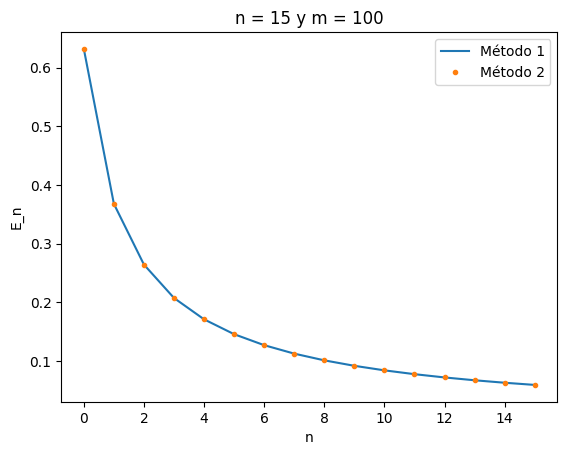

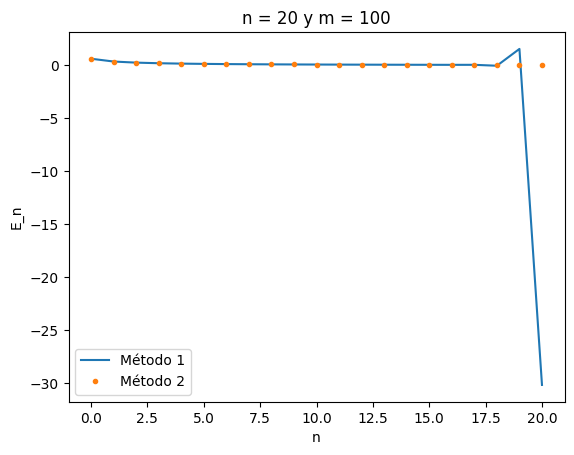

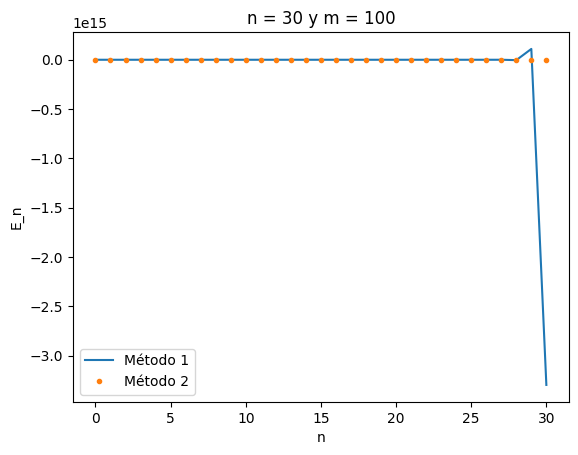

In [2]:
def metodo1(N):
    """
    El método calcula desde 0 hasta n y retorna el resultado.
    """
    v = np.zeros(N+1)
    v[0] = 1 - 1/np.e
    for k in range(1, N+1):
        v[k] = 1 - k*v[k-1]
    return v

def metodo2(N, m=100):
    """
    El método calcula desde m hasta 0, pero retorna los valores desde 0 hasta n.
    """
    v = np.zeros(m+1)
    for k in range(m, 0, -1):
        # Este For parte con k=m e itera hacia atrás, hasta k=1
        v[k-1] = (1 - v[k]) / k
    return v[:N+1]

m = 100
n = 15
fwd = metodo1(n)
bwd = metodo2(n, m)

plt.plot(np.arange(n+1), fwd, '-', label='Método 1')
plt.plot(np.arange(n+1), bwd, '.', label='Método 2')
plt.xlabel('n')
plt.ylabel('E_n')
plt.legend()
plt.title(f'n = {n} y m = {m}')
plt.show()

m = 100
n = 20
fwd = metodo1(n)
bwd = metodo2(n, m)

plt.plot(np.arange(n+1), fwd, '-', label='Método 1')
plt.plot(np.arange(n+1), bwd, '.', label='Método 2')
plt.xlabel('n')
plt.ylabel('E_n')
plt.legend()
plt.title(f'n = {n} y m = {m}')
plt.show()

m = 100
n = 30
fwd = metodo1(n)
bwd = metodo2(n, m)

plt.plot(np.arange(n+1), fwd, '-', label='Método 1')
plt.plot(np.arange(n+1), bwd, '.', label='Método 2')
plt.xlabel('n')
plt.ylabel('E_n')
plt.legend()
plt.title(f'n = {n} y m = {m}')
plt.show()

Observamos que, cuando $n$ es mayor a $20$, el primer método diverge, mientras que el segundo método no.

<div class="alert alert-block alert-info"> <b> Problema 3. Algortimo para cálculo de $\pi$. </b> </div>

A continuación describimos un algoritmo para calcular $\pi$.
Comenzar inicializando las variables $a, b, c, d, e$ del siguiente modo: 
$a = 0, b = 1, c = 1/\sqrt{2}, d= 1/4, e= 1$. Luego, iterar $n$ veces en el orden dado las siguientes formulas:
\begin{equation*}
a=b, \quad b= \frac{b+c}{2},\quad  c=\sqrt{ca},\quad d=d-e(b-a)^2,\quad e=2e.
\end{equation*}
Finalmente, el valor de $\pi$ puede estimarse por $f = b^{2}/d$, o por $g = (b+c)^{2}/(4d)$.

Escriba un pseudocódigo del algoritmo siguiendo el formato visto en clases. Luego programe el algoritmo para calcular los valores de $\pi$ estimados por $f$ y $g$ cuando $n = 1,2,..., 10$. ¿Que estimación converge más rápido? Reporte el error para cada iteraci\'on comparando con el valor de $\pi$ con 36 d\'igitos
$$
\pi = 3,14159265358979323846264338327950288.
$$


<div class="alert alert-block alert-success"> <b> Solución. </b> </div>

Tenemos el siguiente pseudocódigo:

**Algoritmo EstimarPI.**

**Input:** número de iteraciones $n$.

**Output:** estimaciones de $\pi$, $f$ y $g$.

Inicializamos $a=0$, $b=1$, $c=1/\sqrt{2}$, $d=1/4$ y $e=1$

For $k=1,...,n$:  
1. $a=b$  
2. $b = (b + c)/2$  
3. $c = √(c * a)$  
4. $d = d − e * (b − a)^2$  
5. $e = 2 * e$
End For

$f = b^2 / d$  
$g = (b + c)^2 / (4*d)$  

**Fin del algoritmo**

In [3]:
def estimacion_pi(n):
    # Inicializamos 
    a = 0
    b = 1
    c = 1 / np.sqrt(2)
    d = 1 / 4
    e = 1

    for i in range(n): # Iteramos n veces.
        a = b
        b = (b + c)/2
        c = np.sqrt(c*a)
        d = d - e*(b - a)**2
        e = 2*e

    estimacion1 = b**2 / d
    estimacion2 = (b + c)**2 / (4*d)
    
    return  estimacion1, estimacion2

In [4]:
pi_36 = 3.14159265358979323846264338327950288

# Aqui guardaremos las estimaciones
est_1_list = []
est_2_list = []

# Aqui guardaremos los errores
err_1 = []
err_2 = []

for n in range(10):
    # Calculamos las estimaciones con n iteraciones.
    est_1, est_2 = estimacion_pi(n)
    est_1_list.append(est_1)
    est_2_list.append(est_2)

    # Calculamos los errores absolutos para cada método
    err_1.append(abs(est_1 - pi_36))
    err_2.append(abs(est_2 - pi_36))

df = pd.DataFrame({
    "n": list(range(10)),
    "f": est_1_list,
    "error_f": err_1,
    "g": est_2_list,
    "error_g": err_2
})

print(df.to_string(index=False))

 n        f      error_f        g      error_g
 0 4.000000 8.584073e-01 2.914214 2.273791e-01
 1 3.187673 4.607999e-02 3.140579 1.013403e-03
 2 3.141680 8.763971e-05 3.141593 7.376250e-09
 3 3.141593 3.056542e-10 3.141593 8.881784e-16
 4 3.141593 8.881784e-16 3.141593 8.881784e-16
 5 3.141593 8.881784e-16 3.141593 8.881784e-16
 6 3.141593 8.881784e-16 3.141593 8.881784e-16
 7 3.141593 8.881784e-16 3.141593 8.881784e-16
 8 3.141593 8.881784e-16 3.141593 8.881784e-16
 9 3.141593 8.881784e-16 3.141593 8.881784e-16


Del resultado anterior vemos que el error absoluto de la estimación $g$ deciende más rápidamente que el error absoluto de la estimación $f$.

<div class="alert alert-block alert-info"> <b> Problema 4. Eliminación Gaussiana - matriz de Hilbert. </b> </div>
Programe el método de eliminación Gaussiana sin pivoteo para resolver el sistema lineal $ Ax = b$.  Luego adapte el programa u observe como calcular $A^{-1}$. 
Testee el programa calculando la inversa de la matriz de Hilbert $H_9$. La matriz de Hilbert $H_n\in \mathbb R^{n\times n}$ se define  por
\[
(H_{n})_{i,j} = \frac{1}{i+j-1}
\]
para $i,j=1,...,n$. 

<div class="alert alert-block alert-success"> <b> Solución. </b> </div>

In [5]:
# Algoritmos relevantes importados del notebook del capítulo 2

def forward_substitution(L,b):
    n = L.shape[0]; y = np.zeros(n)
    y[0] = b[0]/L[0,0]
    for i in range(1,n):
        y[i] = (b[i] - np.dot(L[i,0:i],y[0:i]))/L[i,i]
    return y

def backward_substitution(U,y):
    n = U.shape[0]; x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = (y[i] - np.dot(U[i,(i+1):n],(x[(i+1):n])))/U[i,i]
    return x

def GE(Ainput, binput):
    A = Ainput.copy() # se va a modificar
    b = binput.copy() # se va a modificar
    # 1. Factorize A = LU
    L, U = LU(A)
    # 2. Solve LUx = b forward substitution
    y = forward_substitution(L, b)
    # 3. Solve Ux = L^{-1} b backward substitution
    x = backward_substitution(U,y)
    return x

def LU(Ainput):
    A = Ainput.copy() # se va a modificar
    n = A.shape[0]
    for i in range(n-1):
        if A[i, i] == 0:
            raise ValueError("coeficient is zero.")
        A[(i+1):n,i] = (A[(i+1):n,i]/A[i,i])
        A[(i+1):n, (i+1):n][:] = A[(i+1):n, (i+1):n]-np.outer(A[(i+1):n,i],A[i, (i+1):n])
    L = np.tril(A,-1)+np.eye(n)
    U = np.triu(A)
    return L, U

Para calcular $A^{-1}$, podemos resolver el sistema $AX=I$ para cada columna de $X$, resultando en los sistemas $Ax_i = e_i$, donde $e_i$ son los vectores canónicos.

In [6]:
def calcular_inversa(Ainput):
    A = Ainput.copy()
    n = A.shape[0]
    invA = A.copy()
    I = np.eye(n)
    # Resolvemos el sistema AX = I para cada columna de X:
    for k in range(n):
        invA[:,k] = GE(A, I[k])
    return invA

n = 9
H = hilbert(n)
invH = calcular_inversa(H)

print(invH)

print(f"\nNorma del error: {np.linalg.norm(invH @ H - np.eye(n), 2)}")

[[ 8.09999273e+01 -3.23999484e+03  4.15799108e+04 -2.49479352e+05
   8.10807594e+05 -1.51350703e+06  1.62161425e+06 -9.26636499e+05
   2.18789130e+05]
 [-3.23999484e+03  1.72799634e+05 -2.49479367e+06  1.59666741e+07
  -5.40538296e+07  1.03783328e+08 -1.13512993e+08  6.58941523e+07
  -1.57528184e+07]
 [ 4.15799107e+04 -2.49479367e+06  3.84198107e+07 -2.56132008e+08
   8.91888059e+08 -1.74810030e+09  1.94233338e+09 -1.14161621e+09
   2.75674338e+08]
 [-2.49479352e+05  1.59666741e+07 -2.56132008e+08  1.75633346e+09
  -6.24321569e+09  1.24309346e+10 -1.39848000e+10  8.30266346e+09
  -2.02161191e+09]
 [ 8.10807591e+05 -5.40538294e+07  8.91888057e+08 -6.24321568e+09
   2.25449434e+10 -4.54506023e+10  5.16484082e+10 -3.09187732e+10
   7.58104497e+09]
 [-1.51350703e+06  1.03783328e+08 -1.74810029e+09  1.24309346e+10
  -4.54506022e+10  9.25539495e+10 -1.06051397e+11  6.39305102e+10
  -1.57685741e+10]
 [ 1.62161424e+06 -1.13512992e+08  1.94233337e+09 -1.39848000e+10
   5.16484081e+10 -1.0605139

Vemos que $\|H^{-1}H - I\|$ es bastante grande, lo que sugiere que el problema esta mal condicionado.